<a href="https://colab.research.google.com/github/why00n/card/blob/main/lgbm_heeyoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

path='/content/drive/MyDrive/creditcard'
train=pd.read_csv(path+'/train.csv',sep=',')
train=train.drop('index',axis=1)

test=pd.read_csv(path+'/test.csv', sep=',')
test=test.drop('index',axis=1)

In [ ]:
train=train.drop_duplicates(keep='first')
test=test.drop_duplicates(keep='first')

train=train.drop('FLAG_MOBIL',axis=1)
test=test.drop('FLAG_MOBIL',axis=1)

train['DAYS_BIRTH']=train['DAYS_BIRTH'].abs()
train.loc[(train.DAYS_EMPLOYED > 0 ), 'DAYS_EMPLOYED']=0
train['DAYS_EMPLOYED']=train['DAYS_EMPLOYED'].abs()
train['begin_month']=train['begin_month'].abs()

test['DAYS_BIRTH']=test['DAYS_BIRTH'].abs()
test.loc[(test.DAYS_EMPLOYED > 0 ), 'DAYS_EMPLOYED']=0
test['DAYS_EMPLOYED']=test['DAYS_EMPLOYED'].abs()
test['begin_month']=test['begin_month'].abs() 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score

x=train.drop('credit', axis=1)
y=train['credit'].values

for i in x.columns:
  col_type=x[i].dtype
  if col_type == 'object':
    x[i]=x[i].astype('category')

# train/test split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=101, stratify=y)
print('length of X_train and x_test: ', len(x_train), len(x_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

# fit a lightGBM model to the data
lgb=LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy','AUC'],eval_metric='F1')
lgb.fit(x_train, y_train, eval_set=(x_test, y_test), feature_name='auto', categorical_feature='auto', verbose=50)

# make prediction
x_pred=lgb.predict(x_train)
y_pred=lgb.predict(x_test)

acc_train=accuracy_score(y_train, x_pred)
acc_test=accuracy_score(y_test, y_pred)

print(f'학습: {acc_train}, 테스트:{acc_test}')
# prediction of accuracy

length of X_train and x_test:  19858 4965
length of y_train and y_test:  19858 4965
[50]	valid_0's multi_logloss: 0.787344
[100]	valid_0's multi_logloss: 0.774895
학습: 0.7092859301037365, 테스트:0.694662638469285


In [ ]:
log_loss(y_train, lgb.predict_proba(x_train))
log_loss(y_test,lgb.predict_proba(x_test))

0.7748946839602812

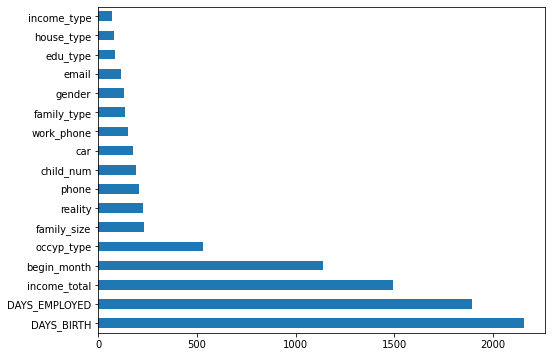

In [ ]:
from sklearn.inspection import permutation_importance

feat_imp=pd.Series(lgb.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,6))
plt.show()